# TESLA Model S Induction Motor Design

## 1. Introduction

Model S is introduced in June 2012 by Tesla Motors. It has been sold over 100k by December 2015. The very first model with 85 kWh battery pack has a range of 426 km.

Induction motor used in this model is required to be designed using analytical calculations and motoranalysis tool in Matlab.

The following are the useful links benefited using the design procedure of Model S IM.

See [Tire Dimensions](https://www.mcgrefer.com/sizeinfo/2454519)

See [Model S Specs](https://en.wikipedia.org/wiki/Tesla_Model_S)

See [Presentation](http://sites.ieee.org/miami/files/2014/11/Hendershot-FIU-Lecture.pdf)

## 2. Design Specifications and Basic Calculations

In [1]:
import math
gr=9.73 #Gear ratio of Tesla
wr=0.35155 #Wheel radius of Tesla
Max_spd=230 #Max speed in km/h
Max_speed=Max_spd*1000/3600 #Max speed in m/s
Ang_speed=Max_speed*2*math.pi*wr #Max angular velocity
Motor_speed=Ang_speed*gr #Motor speed in rad/sed
n_max=Motor_speed*60/(2*math.pi) #Max speed of motor in rpm
print ('Max motor speed is',round(n_max),'rpm')

Max motor speed is 13112 rpm


In [2]:
Bat_volt=400 #Battery voltage in Volts
Vfund=(Bat_volt/2)*(4/math.pi) #Fundamental phase voltage
Vrms=Vfund*math.sqrt(3)/math.sqrt(2) #Rms line voltage
print ('Line voltage is', round(Vrms),'V')

Line voltage is 312 V


For vector controlled inverters the line voltage is calculated as follows:

In [3]:
Vphase_peak=Bat_volt/math.sqrt(3)
Vline=Vphase_peak*math.sqrt(3)/math.sqrt(2) #Rms line voltage for vector controlled drive
Vphase=Vphase_peak/math.sqrt(2) #Rms phase voltage
print ('Vline =', round(Vline),'V')
print ('Vphase =', round(Vphase),'V')

Vline = 283 V
Vphase = 163 V


Initially, let the power factor and efficiency be as follows:

In [4]:
eff=0.95 #Rated efficiency
pf=0.85 #Power factor

In [5]:
Pmax=285000 #Max power of motor in Watts
Imax=Pmax/(math.sqrt(3)*Vline*eff*pf)
print ('Imax =', round(Imax),'A')

Imax = 720 A


Pole number is selected as 4 and the machine is known to be a 3 phase machine

In [6]:
pp=2 #Pole pair
p=4 #Pole number
m=3 #Phase number

In [7]:
fmax=n_max*p/120 #Max frequency of motor
print ('fmax =', round(fmax), 'Hz')

fmax = 437 Hz


Tesla can produce power up to 285kW and from the following torque/speed and power/speed characteristics it can be seen that it is for a certain speed range.

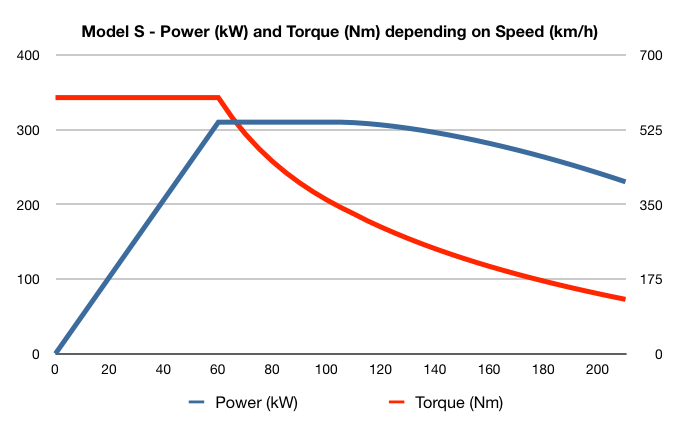

In [8]:
from IPython.display import Image
Image(filename='ModelS Torque Speed.png', width=500)

For a more realistic operating frequency (rated frequency), use 90 km/h as rated speed and calculate the nominal stator frequency

In [9]:
Rtd_speed=90 #Rated speed in km/h
f=fmax/Max_spd*Rtd_speed #Nominal frequency
print ('Nominal frequency is', round(f), 'Hz')

Nominal frequency is 171 Hz


## 3. Main Dimensions of Stator Core

In [10]:
KE=0.98-0.005*pp
Sgap=KE*Pmax/(eff*pf)
print ('KE =',KE)
print ('Sgap =',round(Sgap,2))

KE = 0.97
Sgap = 342352.94


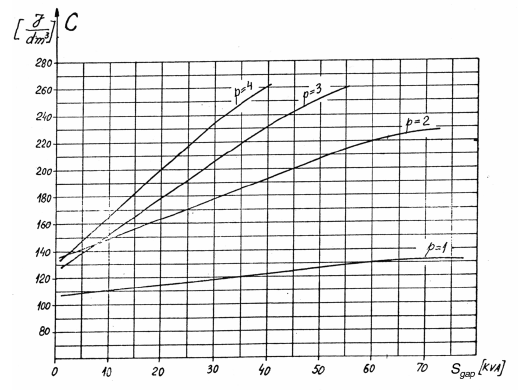

In [11]:
Image(filename='Essons Constant.png', width=500)

Esson's constant for a 2 pole pair machine is selected from the above figure. 

In [12]:
C0=240e3 #Esson's constant in J/m^3
lambda1=1.5 #Stack aspect ratio for pp=2 motor
Dis=math.pow((2*pp*pp*Sgap)/(math.pi*lambda1*f*C0),1/3) #Stator bore diameter in m
print ('Dis =', round(Dis,4)*100, 'cm')

Dis = 24.19 cm


In [13]:
tau=math.pi*Dis/(2*pp) #Pole pitch in m
L=lambda1*tau #Stack length in m
print ('tau =', round(tau,3))
print ('L =', round(L,2))

tau = 0.19
L = 0.29


For a better performance, stator slots per pole per phase q is selected as 4. 

Slot pitch tau_s is calculated as follows:

In [14]:
q=4
tau_s=tau/(m*q) #Slot pitch in m
print ('tau_s =', round(tau_s,4))

tau_s = 0.0158


For 2pp=4, KD is chosen as 0.62.

In [15]:
KD=0.62 #Dis/Dout
Dout=Dis/KD #Stator outer diameter in m
print ('Dout =', round(Dout,2)*100, 'cm')

Dout = 39.0 cm


In [16]:
g=(0.1+0.012*math.pow(Pmax,1/3))*1e-3 #Air gap length in m for 2pp>2
print ('g =', round(g,4)*1000, 'mm')

g = 0.9 mm


Too small airgap would produce large space airgap field harmonics and additional losses while a too large one would reduce the power factor and efficiency.

The airgap found above is a moderate one to be used in later steps.

## 4. Stator Winding

Two-layer winding with chorded coils, y/tau=10/12 is chosen 10/12=0.83 to reduce the 5th harmonic in mmf.

In [17]:
Ns=p*q*m #Number of stator slots
print ('Ns =',Ns,'slots')

Ns = 48 slots


In [18]:
alpha_ec=2*math.pi*pp/Ns #Electrical angle between emfs in neighboring slots in rad
print ('alpha_ec =', round(alpha_ec,2),'rad')

alpha_ec = 0.26 rad


In [19]:
Kq1=math.sin(q*alpha_ec/2)/(q*math.sin(alpha_ec/2)) #Distribution factor
Ky1=math.sin(math.pi/2*10/12) #Pitch factor
Kw1=Kq1*Ky1 #Winding factor
print ('Kq1 =',round(Kq1,2))
print ('Ky1 =',round(Ky1,2))
print ('Kw1 =',round(Kw1,2))

Kq1 = 0.96
Ky1 = 0.97
Kw1 = 0.93


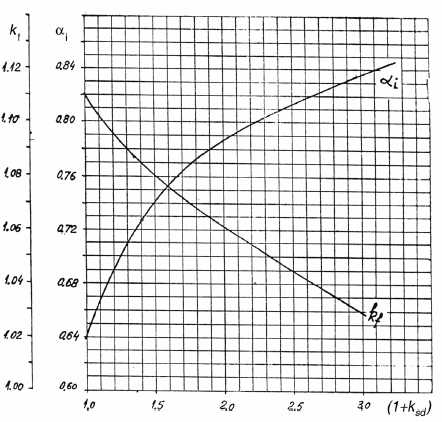

In [20]:
Image(filename='Form Factor.png', width=500)

Form factor, Kf and pole spanning coefficient, alpha_i are selected from the above figure.

In [21]:
Bg=0.65 #Air gap flux density in T
Kf=1.085 #Form factor
alpha_i=0.726 #Pole spanning coefficient
phi=alpha_i*tau*L*Bg #Pole flux in Wb
print ('phi =',round(phi,4),'Wb')

phi = 0.0256 Wb


In [22]:
W1=KE*Vphase/(4*Kf*Kw1*f*phi) #Number of turns per phase
print ('W1 =',round(W1,2),'turns/phase')

W1 = 9.03 turns/phase


In [23]:
a1=2 #Number of current paths in parallel for low voltage IMs with power rating above 100kW
ns=a1*W1/(pp*q) #Number of conductors per slot
print ('ns =',round(ns,2),'conductors')

ns = 2.26 conductors


ns should be an even number as there are two distinct coils per slot in a
double layer winding. Choose ns=2, then recalculate W1 and Bg

In [24]:
ns=2
W1_old=W1
W1=pp*q*ns/a1 #Recalculated number of turns per phase
Bg=Bg*W1_old/W1 #Recalculated air gap flux density in T
print ('W1 =',W1,'turns/phase')
print ('Bg =',round(Bg,3),'T')

W1 = 8.0 turns/phase
Bg = 0.733 T


It should be noted that the air gap flux denisty is increased and the final value is a suitable one for IMs.

In [25]:
Iln=Imax #Rated current
Jcus=20 #Initial current density in A/mm^2 for liquid cooled motors
Acu=Iln/(Jcus*a1) #Magnetic wire cross section in mm^2
rcu=math.sqrt(Acu/math.pi) #Wire radius in mm
dcu=2*rcu #Wire diameter in mm
print ('Acu =',round(Acu,2),'mm^2')
print ('rcu =',round(rcu,2),'mm')
print ('dcu =',round(dcu,2),'mm')

Acu = 18.01 mm^2
rcu = 2.39 mm
dcu = 4.79 mm


Since dcu>1.3 mm parallel conductors should be used 

Use 6 conductors in parallel, ap=6

In [26]:
ap=6 #Parallel path number (number of strands)
dcu=math.sqrt(4*Acu/(math.pi*ap)) #Recalculated wire diameter in mm
print ('dcu =',round(dcu,2),'mm')

dcu = 1.96 mm


In [27]:
Skin_depth=6.62/math.sqrt(f) #Skin depth in cm
print ('Skin_depth =',round(Skin_depth,2)*10,'mm')
Dw=2*Skin_depth #Wire diameter in cm
print ('Dw =',round(Dw,2)*10,'mm')

Skin_depth = 5.1 mm
Dw = 10.1 mm


It is checked that the conductor is fully utilized since the skin depth is more than calculated wire radius, dcu/2.

Wire diameter shall be selected using the following table. Select dcu=2 mm wire

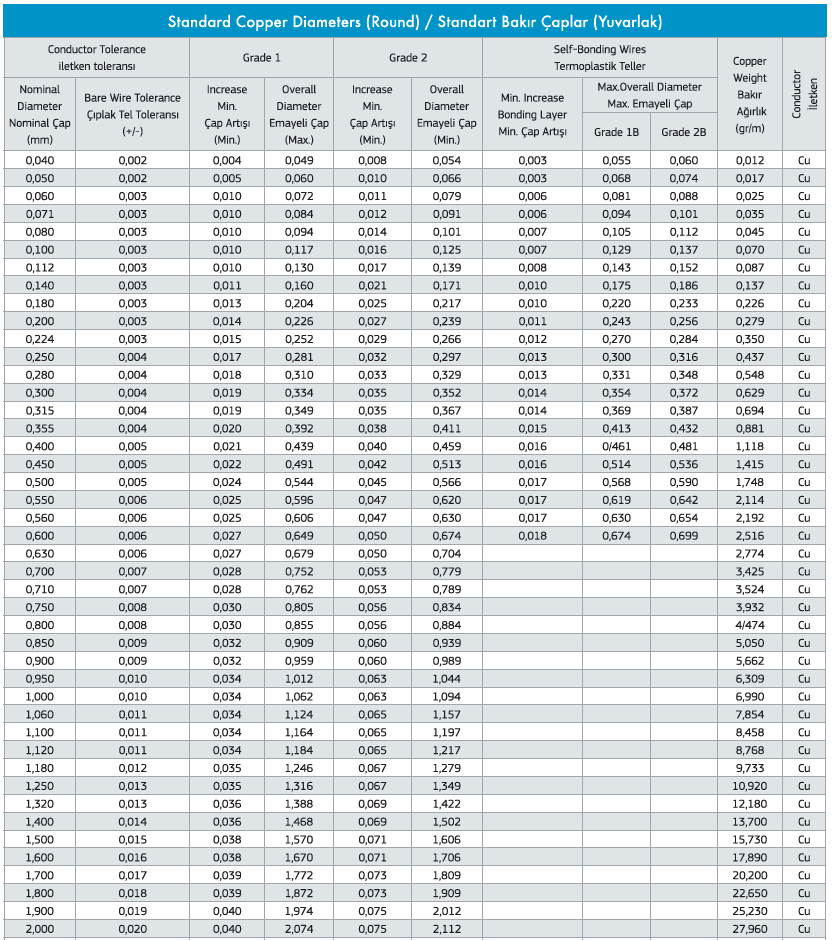

In [28]:
Image(filename='Cu Wire Specs.png', width=700)

Electrical loading and magnetic loading are calculated accordingly as:

In [29]:
q_l=m*2*W1*Iln/(math.pi*Dis*L) #Electric Loading in A/m^2
B_l=phi/(math.pi*Dis*L/(2*pp)) #Magnetic Loading in T
print ('q_l =',round(q_l,2),'A/m^2')
print ('B_l =',round(B_l,2),'T')

q_l = 159641.49 A/m^2
B_l = 0.47 T


## 5. Stator Slot Sizing

In [30]:
Kfill=0.44 #Fill factor for round wire
Asu=math.pi*dcu*dcu*ap*ns/(4*Kfill) #Useful slot area in mm^2
print ('Asu =',round(Asu,2),'mm^2')

Asu = 81.87 mm^2


For stator slot geometry, parallel tooth is selected.

bos, hos, hw are assigned values from past experience: bos = 2 to 3 mm ≤
8g, hos = (0.5 to 1.0) mm, wedge height hw = 1 to 4 mm

Assuming that all the airgap flux passes through the stator teeth:
Bg x tau_s x L ≈ Bts x bts x L x Kfe

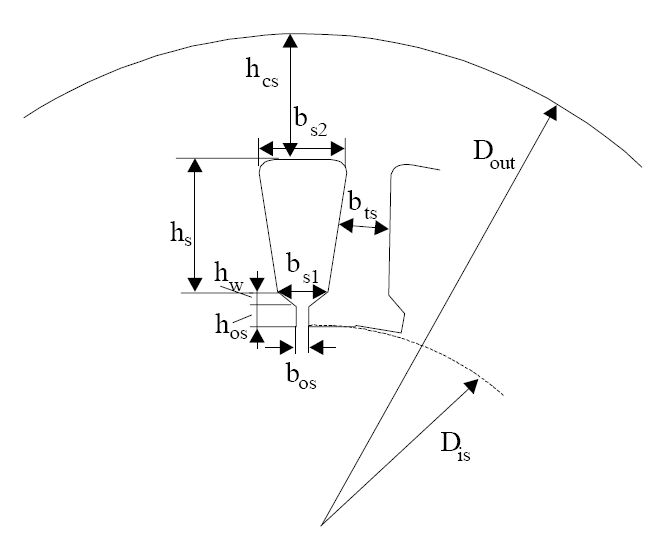

In [31]:
Image(filename='Stator Slot Geometry.png', width=500)

The core material is selected from the following figure. Selected steel lamination is M270-35A and its thickness is 0.35.

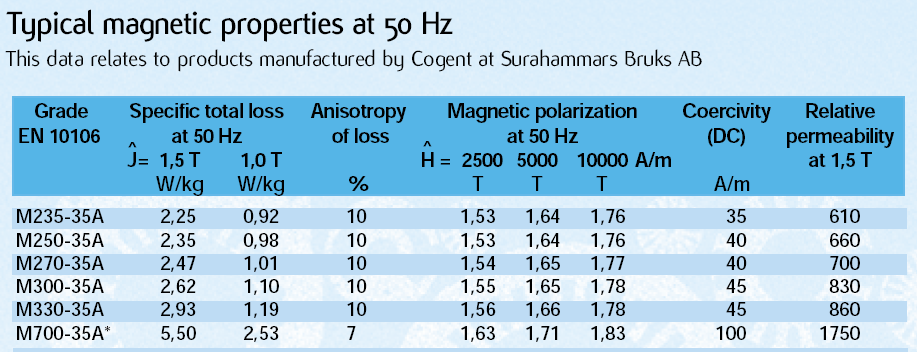

In [32]:
Image(filename='Steel Selection.png', width=500)

Properties of the selected steel is shown on the following figure. The saturation flux density level is as high as 1.8 T.

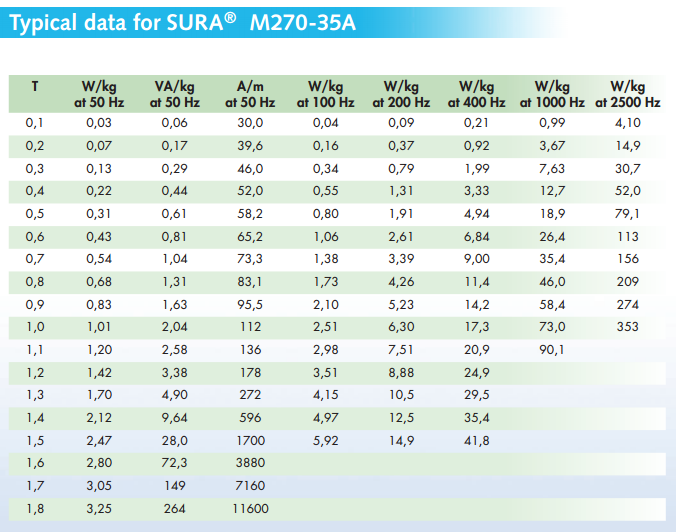

In [33]:
Image(filename='M270-35A Specs.png', width=500)

In [34]:
Kfe=0.96 #For 0.35-0.5 mm thick lamination
Bts=1.6 #Tooth flux density in T
bts=Bg*tau_s/(Bts*Kfe) #Tooth width in m
print ('bts =',round(bts,4)*1000,'mm')

bts = 7.6 mm


If lamination thickness changes, change Kfe value.

In [35]:
bos=2.2e-3
hos=1e-3
hw=1.5e-3
bs1=math.pi*(Dis+2*hos+2*hw)/Ns-bts #lower slot width
bs2=math.sqrt(4*Asu*1e-6*math.tan(math.pi/Ns)+bs1*bs1) #Upper slot width in m
hs=2*Asu*1e-6/(bs1+bs2) #Slot useful height in m
print ('bs1 =',round(bs1,5)*1000,'mm')
print ('bs2 =',round(bs2,5)*1000,'mm')
print ('hs =',round(hs,5)*1000,'mm')

bs1 = 8.6 mm
bs2 = 9.77 mm
hs = 8.91 mm


In [36]:
u0=4*math.pi*1e-7 #Permeability of free space
Fmg=1.2*g*Bg/u0 #Air gap mmf
Hts=3880  #Magnetic field intensity for Bts=1.6 T in A/m
Fmts=Hts*(hs+hos+hw) #Stator tooth mmf
Kst=1.4-1 #Teeth saturation factor
Fmtr=Kst*Fmg-Fmts #Rotor tooth mmf
print ('Fmg =',round(Fmg,2),'Aturns')
print ('Fmts =',round(Fmts,2),'Aturns')
print ('Fmtr =',round(Fmtr,2),'Aturns')

Fmg = 623.16 Aturns
Fmts = 44.29 Aturns
Fmtr = 204.98 Aturns


In [37]:
hcs=(Dout-(Dis+2*(hos+hw+hs)))/2 #Stator back iron height in m
print ('hcs =',round(hcs,4)*1000,'mm')

hcs = 62.7 mm


In [38]:
Bcs=phi/(2*L*hcs) #Back core flux density in T
print ('Bcs =',round(Bcs,2),'T')

Bcs = 0.71 T


If Bcs is calculated to be too large. There are three main ways to solve this problem.

One is to simply increase the stator outer diameter until Bcs ≈ 1.4 to 1.7 T. 

The second solution consists in going back to the design start and introducing a larger stack aspect ratio, λ which eventually would result in a smaller Dis, and, finally, a larger back iron height hcs and thus a lower Bcs.

The third solution is to increase current density and thus reduce slot height hs. However, if high efficiency is the target, such a solution is to be used
cautiously.

## 6. Rotor Slot Sizing

The correspondence between the stator and rotor numbers of slots is important to
reduce parasitic torque, additional losses, radial forces, noise, and vibration.

From lecture notes [slide 30](http://keysan.me/presentations/ee564_basic_machine_design2.html#30) a safe choice for rotor slot number is 66.

For rotor slot geometry, parallel tooth is selected.

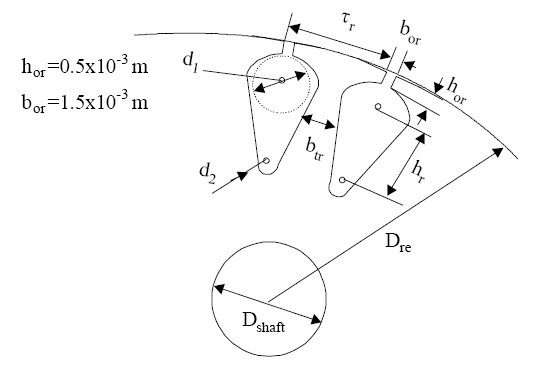

In [39]:
Image(filename='Rotor Slot Geometry.png', width=500)

In [40]:
Nr=68 #Rotor bar (slot) number
K1=0.8*pf+0.2 #Rotor to stator mmf ratio
Ib=K1*(2*m*W1*Kw1)/Nr*Iln #Rotor bar current in A
print ('Ib =',round(Ib,2),'A')

Ib = 413.97 A


For higher efficiency, rotor bars are selected as copper. Note that resistivity of copper is 1.72e-8.

In [41]:
Jb=20 #Current density in the rotor bar in A/mm^2
Ab=Ib/Jb*1e-6 #Rotor slot area in m^2
print ('Ab =',round(Ab,5),'m^2')

Ab = 2e-05 m^2


In [42]:
Ier=Ib/(2*math.sin(math.pi*pp/Nr)) #End ring current in A
Jer=0.75*Jb #Current density in the end ring in A/mm^2
Aer=Ier/Jer*1e-6 #End ring cross section in m^2
print ('Ier =',round(Ier),'A')
print ('Jer =',Jer,'A/mm^2')
print ('Aer =',round(Aer,5),'m^2')

Ier = 2243 A
Jer = 15.0 A/mm^2
Aer = 0.00015 m^2


In [43]:
hor=0.5e-3
bor=1.5e-3
tau_r=math.pi*(Dis-2*g)/Nr #Rotor slot pitch in m
print ('tau_r =',round(tau_r,4)*1000,'mm')

tau_r = 11.1 mm


In [44]:
Btr=1.6 #Rotor tooth flux density in T
btr=Bg/(Kfe*Btr)*tau_r #Rotor tooth width in m
Dre=Dis-2*g #Rotor diameter in m
d1=(math.pi*(Dre-2*hor)-Nr*btr)/(math.pi+Nr) #Upper rotor slot diameter in m
print ('btr =',round(btr,4)*1000,'mm')
print ('Dre =',round(Dre,4)*1000,'mm')
print ('d1 =',round(d1,4)*1000,'mm')

btr = 5.3 mm
Dre = 240.1 mm
d1 = 5.5 mm


In [45]:
d2=math.sqrt(8*math.tan(math.pi/Nr)*Ab-math.pi*d1*d1*math.tan(math.pi/Nr)-2*d1*d1/(math.pi*math.tan(math.pi/Nr)-2)) #lower rotor slot diameter in m
hr=math.fabs(d1-d2)/(2*math.tan(math.pi/Nr)) #Rotor slot height in m
print ('d2 =',round(d2,4)*1000,'mm')
print ('hr =',round(hr,4)*1000,'mm')

d2 = 6.0 mm
hr = 5.3 mm


In [46]:
Htr=3880 #Magnetic field intensity for Bts=1.6 T in A/m
Fmtr=Htr*(hr+hor+(d1+d2)/2) #Rotor teeth mmf
Bcr=1.6 #Rotor back core flux density in T
hcr=phi/2/(L*Bcr) #Rotor back core height in m
print ('Fmtr =',round(Fmtr,2),'Aturns')
print ('hcr =',round(hcr,4)*1000,'mm')

Fmtr = 44.8 Aturns
hcr = 28.0 mm


In [47]:
Ds_max=Dis-2*g-2*(hor+(d1+d2)/2+hr+hcr) #Maximum shaft diameter in m
Sn=0.02 #Define rated slip
Ten=Pmax/(2*math.pi*f/pp*(1-Sn)) #Rated shaft torque in Nm
print ('Ds_max =',round(Ds_max,3)*1000,'mm')
print ('Ten =',round(Ten,2),'Nm')

Ds_max = 161.0 mm
Ten = 541.25 Nm


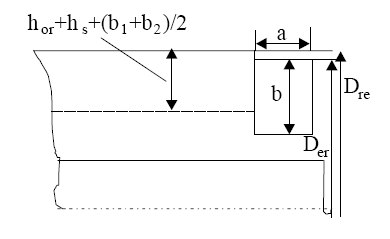

In [48]:
Image(filename='End Ring Cross Section.png', width=350)

In [49]:
Der=Dre-3.5e-3 #End ring diameter in m
b=1.1*(hr+hor+(d1+d2)/2) #End ring height in m
a=Aer/b #End ring width in m
print ('Der =',round(Der,4)*1000,'mm')
print ('b =',round(b,6)*1000,'mm')
print ('a =',round(a,4)*1000,'mm')

Der = 236.6 mm
b = 12.702 mm
a = 11.799999999999999 mm


## 7. Magnetization Current

In [50]:
gamma1=bos*bos/(5*g+bos) #In m
gamma2=bor*bor/(5*g+bor) #In m
Kc1=tau_s/(tau_s-gamma1)
Kc2=tau_r/(tau_r-gamma2)
Kc=Kc1*Kc2 #Total Carter coefficient
print ('Kc =',round(Kc,2))

Kc = 1.09


Kc is close to 1.2 which is assumed initially when calculating Fmg.

Back core mmfs Fmcs and Fmcr are calculated as follows:

In [51]:
Hcs=480 #Stator back core flux intensity in A/m
Hcr=3460 #Rotor back core flux intensity in A/m
Fmcs=0.88*math.exp(-0.4*Bcs*Bcs)*(math.pi*(Dout-hcs)/(2*pp))*Hcs #Stator back core mmf in Aturns
Fmcr=0.88*math.exp(-0.4*Bcr*Bcr)*(math.pi*(Ds_max+hcr)/(2*pp))*Hcr #Rotor back core mmf in Aturns
print ('Fmcs =',round(Fmcs,2),'Aturns')
print ('Fmcr =',round(Fmcr,2),'Aturns')

Fmcs = 88.56 Aturns
Fmcr = 162.35 Aturns


In [52]:
Flm=2*(Kc*g*Bg/u0+Fmts+Fmtr+Fmcs+Fmcr) #Magnetization mmf in Aturns
Ks=Flm/(2*Fmg)-1 #Total saturation factor
print ('Flm =',round(Flm,2),'Aturns')
print ('Ks =',round(Ks,2))

Flm = 1807.08 Aturns
Ks = 0.45


In [53]:
Iu=(math.pi*pp*Flm/2)/(3*math.sqrt(2)*W1*Kw1) #Magnetization current in A
iu=Iu/Iln #Relative (p.u.) value of Iu
print ('Iu =',round(Iu,2),'A')
print ('iu =',round(iu,2),'A')

Iu = 180.82 A
iu = 0.25 A


## 8. Resistances and Inductances

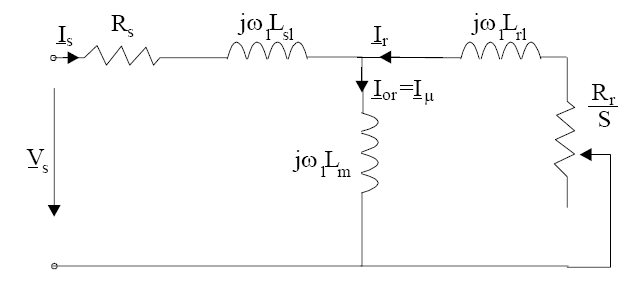

In [54]:
Image(filename='T Equivalent Circuit.png', width=500)

The rated stator temperature is not known yet but the high efficiency target indicates that the winding temperature should not be too large. Therefore, stator temperature is accepted as 80 $^{\circ}$C

In [55]:
Beta=10/12 #Chording factor between 2/3 and 1
y=Beta*tau #Coil span in m
lend=2*y-0.02 #End connection length for 2*pp=4
lc=2*(L+lend) #Coil length in m
rho_cu=1.78e-8 #Copper resistivity at 20 degrees Celcius in Ohm*m
rho_cu_80=rho_cu*(1+1/273*(80-20)) #Copper resistivity at 80 degrees Celcius in Ohm*m
Rs=rho_cu_80*lc*W1/(Acu*1e-6*a1)
print ('y =',round(y,5)*1000,'mm')
print ('lend =',round(lend,5)*1000,'mm')
print ('Rs =',round(Rs,5),'Ohm')

y = 158.34 mm
lend = 296.68 mm
Rs = 0.00561 Ohm


This motor is known to be a highly efficient motor. Rotor bars are made of copper instead of aluminium. The rotor bar/end ring segment equivalent resistance is calculated as follows:

In [56]:
ler=math.pi*(Der-b)/Nr #End ring segment length in m
Beta_s=math.sqrt(2*math.pi*f*u0/(2*rho_cu))
S=1
Ksi=Beta_s*hr*math.sqrt(S)
KR=Ksi*(math.sinh(2*Ksi)+math.sin(2*Ksi))/(math.cosh(2*Ksi)-math.cos(2*Ksi)) #Skin effect resistance coefficient
Rbe=rho_cu_80*(L/Ab*KR+ler/(2*Aer*math.pow(math.sin(math.pi*pp/Nr),2))) #Rotor bar/end ring segment equivalent resistance in Ohm
Rrc=4*m/Nr*math.pow(W1*Kw1,2)*Rbe #Rotor cage resistance reduced to the stator in Ohm
print ('Ksi =',round(Ksi,2))
print ('KR =',round(KR,2))
print ('Rbe =',round(Rbe,5),'Ohm')
print ('Rrc =',round(Rrc,5),'Ohm')

Ksi = 1.03
KR = 1.1
Rbe = 0.00042 Ohm
Rrc = 0.00402 Ohm


In [57]:
lambda_s=(2/3*hs/(bs1+bs2)+2*hw/(bos+bs1)+hos/bos)*(1+3*Beta)/4 #Stator slot connection coefficient
Cs=1-0.033*bos*bos/(g*tau_s)
phi1=math.pi*(6*Beta-5.5)
gamma_ds=(0.14*math.sin(phi1)+0.76)*1e-2
lambda_ds=0.9*tau_s*q*q*Kw1*Kw1*Cs*gamma_ds/(Kc*g*(1.0+Kst)) #Stator differential connection coefficient
lambda_ec=0.34*q/L*(lend-0.64*Beta*tau) #Stator end connection specific geometric permeance coefficient
Xsl=2*u0*2*math.pi*f*L*W1*W1/(pp*q)*(lambda_s+lambda_ds+lambda_ec) #Stator phase reactance in Ohm
print ('lambda_s =',round(lambda_s,2))
print ('Cs =',round(Cs,2))
print ('phi1 =',round(phi1,2))
print ('lambda_ds =',round(lambda_ds,2))
print ('lambda_ec =',round(lambda_ec,2))
print ('Xsl =',round(Xsl,3),'Ohm')

lambda_s = 0.92
Cs = 0.99
phi1 = -1.57
lambda_ds = 0.88
lambda_ec = 0.93
Xsl = 0.017 Ohm


In [58]:
lambda_r=0.66+2*hr/(3*(d1+d2))+hor/bor #Rotor slot connection coefficient
gamma_dr=9*math.pow(6*pp/Nr,2)*1e-2
lambda_dr=0.9*tau_r*gamma_dr/(Kc*g)*math.pow(Nr/(6*pp),2) #Rotor differential connection coefficient
lambda_er=2.3*(Der-b)/(Nr*L*4*math.pow(math.sin(math.pi*pp/Nr),2))*math.log10(4.7*(Der-b)/(b+2*a)) #Stator end ring permeance coefficient
Kx=3/(2*Ksi)*(math.sinh(2*Ksi)-math.sin(2*Ksi))/(math.cosh(2*Ksi)-math.cos(2*Ksi)) #Skin effect coefficient for the leakage reactance
Xbe=2*math.pi*f*u0*L*(lambda_r*Kx+lambda_dr+lambda_er) #Equivalent rotor bar leakage reactance in Ohm
Xrl=4*m*math.pow(W1*Kw1,2)/Nr*Xbe #Rotor leakage reactance in ohm
print ('lambda_r =',round(lambda_r,2))
print ('lambda_dr =',round(lambda_dr,2))
print ('lambda_er =',round(lambda_er,2))
print ('Kx =',round(Kx,2))
print ('Xbe =',round(Xbe,3),'Ohm')
print ('Xrl =',round(Xrl,3),'Ohm')

lambda_r = 1.3
lambda_dr = 0.93
lambda_er = 1.14
Kx = 0.97
Xbe = 0.001 Ohm
Xrl = 0.012 Ohm


For zero speed (S = 1), both stator and rotor leakage reactances are reduced due to leakage flux path saturation. For the power levels of interest here, with semiclosed stator and rotor slots:

In [59]:
Xsl_sat=Xsl*0.75 #Stator leakage reactance at S=1 due to leakage flux path saturation in Ohm
Xrl_sat=Xrl*0.65 #Rotor leakage reactance at S=1 due to leakage flux path saturation in Ohm
print ('Xsl_sat =',round(Xsl_sat,3),'Ohm')
print ('Xrl_sat =',round(Xrl_sat,3),'Ohm')

Xsl_sat = 0.013 Ohm
Xrl_sat = 0.008 Ohm


For rated slip (speed), both skin and leakage saturation effects have to be eliminated (KR = Kx = 1)

In [60]:
Rbe_Sn=rho_cu_80*(L/Ab+ler/(2*Aer*math.pow(math.sin(math.pi*pp/Nr),2))) #Rotor bar/end ring segment equivalent resistance at rated speed in Ohm
Rrc_Sn=Rrc*Rbe_Sn/Rbe #Rotor cage resistance reduced to the stator at rated speed in Ohm
Xbe_Sn=2*math.pi*f*u0*L*(lambda_r+lambda_dr+lambda_er) #Equivalent rotor bar leakage reactance at rated speed in Ohm
Xrl_Sn=Xrl*Xbe_Sn/Xbe #Rotor leakage reactance at rated speed in Ohm
print ('Rbe_Sn =',round(Rbe_Sn,5),'Ohm')
print ('Rrc_Sn =',round(Rrc_Sn,5),'Ohm')
print ('Xbe_Sn =',round(Xbe_Sn,3),'Ohm')
print ('Xrl_Sn =',round(Xrl_Sn,3),'Ohm')

Rbe_Sn = 0.00039 Ohm
Rrc_Sn = 0.00374 Ohm
Xbe_Sn = 0.001 Ohm
Xrl_Sn = 0.013 Ohm


In [61]:
Xm=math.sqrt(math.pow(Vphase/Iu,2)-Rs*Rs)-Xsl #Magnetization reactance in Ohm
print ('Xm =',round(Xm,3),'Ohm')

Xm = 0.886 Ohm


Skewing effect on reactances are considered in the design.

A skewing C of one stator slot pitch τs is typical (c = τs).

In [62]:
K_skew=math.sin(math.pi/(2*m*q))/(math.pi/(2*m*q)) #Skewing factor
Xm=Xm*K_skew #Magnetization reactance including skewing in Ohm
Xrl_skew=Xm*(1-math.pow(K_skew,2))
Xrl_sat_skew=Xrl_sat+Xrl_skew #Final value of rotor leakage reactance at stand still, S=1
Xrl_Sn_skew=Xrl+Xrl_skew #Final value of rotor leakage reactance at rated speed, S=Sn
print ('K_skew =',round(K_skew,3))
print ('Xm =',round(Xm,3),'Ohm')
print ('Xrl_skew =',round(Xrl_skew,3),'Ohm')
print ('Xrl_sat_skew =',round(Xrl_sat_skew,3),'Ohm')
print ('Xrl_Sn_skew =',round(Xrl_Sn_skew,3),'Ohm')

K_skew = 0.997
Xm = 0.884 Ohm
Xrl_skew = 0.005 Ohm
Xrl_sat_skew = 0.013 Ohm
Xrl_Sn_skew = 0.017 Ohm


## 9. Losses and Efficiency

Total losses for the induction motor are copper losses on stator and rotor windings, core losses on the stator, mechanical/ventilation losses and stray losses.

In [63]:
Pcus=3*Iln*Iln*Rs #Stator winding losses in W
Pcur=3*Rrc_Sn*K1*K1*Iln*Iln #Rotor cage losses in W
Pmv=0.012*Pmax #Mechanical/ventilation losses for pp=2 in W
Pstray=0.01*Pmax #Stray losses in W
print ('Pcus =',round(Pcus,2),'W')
print ('Pcur =',round(Pcur,2),'W')
print ('Pmv =',round(Pmv,2),'W')
print ('Pstray =',round(Pstray,2),'W')

Pcus = 8734.96 W
Pcur = 4511.94 W
Pmv = 3420.0 W
Pstray = 2850.0 W


The core loss piron is made of fundamental P1_iron and additional (harmonics)
Ph_iron iron loss. The fundamental core losses occur only in the teeth and back iron (Pt1, Py1) of the stator as the rotor (slip) frequency is low.

In [64]:
gamma_iron=7650 #Iron density in kg/m^3
Ky=1.6 #Influence of mechanical machining
Gt1=gamma_iron*Ns*bts*(hs+hw+hos)*L*Kfe #Stator tooth weight in kg
Gy1=gamma_iron*math.pi/4*(Dout*Dout-math.pow(Dout-2*hcs,2))*L*Kfe #Yoke weight in kg
print ('Gt1 =',round(Gt1,2),'kg')
print ('Gy1 =',round(Gy1,2),'kg')

Gt1 = 8.67 kg
Gy1 = 135.07 kg


In [65]:
Kt=1.7 #Core loss augmentation due to mechanical machining
p10=2.51 #Specific losses (W/kg) at 1.0 T and 50 Hz
Pt1=Kt*p10*math.pow(f/50,1.3)*math.pow(Bts,1.7)*Gt1 #Stator teeth fundamental losses in W
Py1=Ky*p10*math.pow(f/50,1.3)*math.pow(Bcs,1.7)*Gy1 #Stator back iron (yoke) fundamental losses in W
P1_iron=Pt1+Py1 #Fundamental iron losses in W
print ('Pt1 =',round(Pt1,2),'W')
print ('Py1 =',round(Py1,2),'W')
print ('P1_iron =',round(P1_iron,2),'W')

Pt1 = 406.91 W
Py1 = 1516.16 W
P1_iron = 1923.08 W


In [66]:
Kps=1/(2.2-Bts)
Kpr=1/(2.2-Btr)
Bps=(Kc2-1)*Bg #Stator pulse flux density in T
Bpr=(Kc1-1)*Bg #Rotor pulse flux density in T
print ('Bps =',round(Bps,2),'T')
print ('Bpr =',round(Bpr,2),'T')

Bps = 0.03 T
Bpr = 0.04 T


In [67]:
Gtr=gamma_iron*L*Kfe*Nr*(hr+(d1+d2)/2)*btr #Rotor teeth weight in kg
print ('Gtr =',round(Gtr,2),'kg')

Gtr = 8.33 kg


In [68]:
Gts=Gt1
Ps_iron=0.5e-4*(math.pow(Nr*f/pp*Kps*Bps,2)*Gts+math.pow(Ns*f/pp*Kpr*Bpr,2)*Gtr) #Tooth flux pulsation core loss in W
Piron=P1_iron+Ps_iron #Total iron losses in W
print ('Ps_iron =',round(Ps_iron,2),'W')
print ('Piron =',round(Piron,2),'W')

Ps_iron = 51.65 W
Piron = 1974.72 W


In [69]:
Ploss=Pcus+Pcur+Piron+Pmv+Pstray #Total losses in W
print ('Ploss =',round(Ploss,2),'W')

Ploss = 21491.63 W


In [70]:
eff_final=Pmax/(Pmax+Ploss) #Efficiency result
print('Efficiency is',round(eff_final,5)*100,'%')

Efficiency is 92.988 %


The targeted efficiency was 95%, so the design does not hold by 2%.

Since the efficiency is smaller than the target value, the design should return to square one by adopting a larger stator bore diameter Dis, then smaller current densities, etc.

A larger size machine will be obtained, in general.

The former trial resulted in 94.7% efficiency. But that motor was a bit bulky.

## 10. Operation Characteristics

The operation characteristics are defined as active no load current I0a, rated slip Sn, rated torque Tn, breakdown slip and torque Sk, Tbk, current Is and power factor versus slip, starting current, and torque ILR, TLR

In [71]:
I0a=(Piron+Pmv+3*Iu*Iu*Rs)/(3*Vphase) #No load active current in A
Sn=Pcur/(Pmax+Pcur+Pmv+Pstray) #Rated slip
Tn=Pmax/(2*math.pi*f/pp*(1-Sn)) #Rated shaft torque in Nm
print ('I0a =',round(I0a,2),'A')
print ('Sn =',round(Sn,3))
print ('Tn =',round(Tn,2),'Nm')

I0a = 12.14 A
Sn = 0.015
Tn = 538.64 Nm


In [72]:
Cm=1+Xsl/Xm
Tbk=3*pp/(2*2*math.pi*f)*Vphase*Vphase/(Rs+math.sqrt(Rs*Rs+math.pow(Xsl+Cm*Xrl,2))) #Breakdown torque in Nm
ILR=Vphase/(math.sqrt(math.pow(Rs+Rrc,2)+math.pow(Xsl_sat+Xrl_sat,2))) #Starting current in A
TLR=3*Rrc*ILR*ILR/(2*math.pi*f)*pp #Starting torque in Nm
pf_final=Pmax/(3*Vphase*Iln*eff_final) #Final power factor
print ('Tbk =',round(Tbk,2),'Nm')
print ('ILR =',round(ILR,2),'A')
print ('TLR =',round(TLR,2),'Nm')
print ('pf_final =',round(pf_final,3))

Tbk = 2087.22 Nm
ILR = 7144.53 A
TLR = 1146.39 Nm
pf_final = 0.868


Torque vs. slip eq. here. Plot the graph.

In [73]:
import matplotlib.pyplot as plt
import numpy
slip=numpy.linspace(0.1, 1.0, num=50)
Te=3*pp/(2*math.pi*f)*Vphase*Vphase*Rrc_Sn/slip/((Rs+Cm*Rrc_Sn/slip)*(Rs+Cm*Rrc_Sn/slip)+(Xsl+Cm*Xrl_Sn_skew)*(Xsl+Cm*Xrl_Sn_skew)) #Approximate torque vs. slip expression
plt.plot(slip, Te, 'o')
plt.ylim([0, 2000])
'plt.show()'

'plt.show()'

In [74]:
tbk=Tbk/Tn
tLR=TLR/Tn
iLR=ILR/Iln
print ('tbk =',round(tbk,2))
print ('tLR =',round(tLR,2))
print ('iLR =',round(iLR,2))

tbk = 3.87
tLR = 2.13
iLR = 9.92


Check if design needs any iterations.

Higher breakdown or starting ratios tbk, tLR would, for example, need lower rotor leakage inductance and higher rotor resistance as influenced by skin effect. A larger stator bore diameter is again required. In general, it is not easy to make a few changes to get the desired operation characteristics.

## 11. Temperature Rise

A coarse verification of temperature rise is stated. First the temperature differential between the conductors in slots and the
slot wall Δθcu is calculated.

Then, the frame temperature rise Δθframe with respect to ambient air is determined.

In [75]:
lambda_ins=0.25 #Insulation thermal conductivity in W/mK
h_ins=0.3e-3 #Total insulation thickness from the slot middle to teeth wall in m
alpha_cond=lambda_ins/h_ins #The slot insulation conductivity plus its thickness lumped in W/m^2K
alpha_conv=50 #For 4 pole IMs with selfv entilators placed outside the motor in W/m^2K
alpha_conv=50*100 #With liquid cooling, cooling improves 500 times. See references

In [76]:
Als=(2*hs+bs2)*L*Ns #Stator slot lateral area in m^2
theta_cu=Pcus/(alpha_cond*Als) #Temperature differential between the conductors in slots and the slot wall in Celcius degrees
print ('Als =',round(Als,2),'m^2')
print ('theta_cu =',round(theta_cu,2),'C')

Als = 0.38 m^2
theta_cu = 27.76 C


In [77]:
Kfin=3.0 #Finn coefficient
Aframe=math.pi*Dout*(L+tau)*Kfin #Frame area in m^2
theta_frame=Ploss/(alpha_conv*Aframe) #Frame temperature rise with respect to ambient air in Celcius degrees
print ('Aframe =',round(Aframe,2),'m^2')
print ('theta_frame =',round(theta_frame,2),'C')

Aframe = 1.75 m^2
theta_frame = 2.46 C


In [78]:
theta_amb=50 #Ambient temperature in Celcius degrees
theta_w=theta_amb+theta_cu+theta_frame #Winding temperature in Celcius degrees
print ('theta_w =',round(theta_w,2),'C')

theta_w = 80.23 C


Temperature at the windings is calculated as 80 $^{\circ}$C . Such a temperature will not be a problem for this motor.

The former iteration resulted in 250 $^{\circ}$C winding temperature wiht self ventilation. That was not feasible for the rated power.

Ventilation method should was changed. Self ventilation was not enough. The coefficiencts used were updated to liquid cooling type.

## 12. Total Weight

In [79]:
Gs=Gt1+Gy1 #Stator iron weight in kg
Gyr=gamma_iron*math.pi/4*(math.pow(Dre-2*(hor+(d1+d2)/2+hr),2)-math.pow(Ds_max,2))*L*Kfe #Rotor yoke weight
Gr=Gtr+Gyr #Rotor iron weight in kg
Gcus=8940*lc*W1*Acu*1e-6*m #Stator copper weight in kg
Gcur=8940*(Ab*L+Aer*ler)*Nr #Rotor copper weight in kg
Gshaft=gamma_iron*math.pi/4*Ds_max*Ds_max #Shaft weight in kg
Gtotal=Gs+Gr+Gcus+Gcur+Gshaft #Total motor weight excluding the enclosure, ventilation apparatus etc.
print ('Gs =',round(Gs,2),'kg')
print ('Gr =',round(Gr,2),'kg')
print ('Gcus =',round(Gcus,2),'kg')
print ('Gcur =',round(Gcur,2),'kg')
print ('Gtotal =',round(Gtotal,2),'kg')

Gs = 143.74 kg
Gr = 43.16 kg
Gcus = 4.5 kg
Gcur = 4.53 kg
Gtotal = 351.69 kg


The former iteration resulted in 298 kg motor. Current densities are increased since water cooling is adopted. The outer dimensions of the motor is not changed. The result is use of more iron and less copper.

Current densities were increased to reduce the copper weight.

Flux density value was also increased since it was not selected as high as the saturation level. The iron volume did not reduce by increasing the utilization of iron. On the contrary, the iron mass increased so the motor mass.

## 13. Motor Analysis Toolbox Results

### 13.1 Geometry Editor

Geometry Editor window of motoranalysis toolbox requires the following data for stator.

In [80]:
print ('Ns =', Ns) #Number of slots
D1s=Dout #Stator outer diameter in m
print ('D1s =',D1s)
D2s=Dis #Stator bore diameter in m
print ('Dis =',Dis)
Sds=hs+hw+hos #Slot depth in m
print ('Sds =',Sds)
Ws=bts #Tooth width in m
print ('Ws =',Ws)
Ods=hos #Slot opening depth in m
print ('Ods =',Ods)
Ows=bos #Slot opening width in m
print ('Ows =',Ows)
Tas=math.atan(hw/((bs1-bos)/2))*400/(2*math.pi) #Tooth tip angle in grad
print ('Tas =',Tas)
Rcs=(bs2-bs1)/2*math.sqrt(2)/2 #Approximate slot corner radius in mm
print ('Rcs =',Rcs)

Ns = 48
D1s = 0.3902014573956679
Dis = 0.2419249035853141
Sds = 0.011413776258876539
Ws = 0.007561004823714384
Ods = 0.001
Ows = 0.0022
Tas = 27.904636901957915
Rcs = 0.00041311989809138515


Geometry Editor window of motoranalysis toolbox requires the following data for rotor.

In [81]:
print ('Nr =',Nr) #Number of bars
lag=g #Air gap length in m
print ('lag =',lag)
Dshaft=Ds_max #Shaft diameter in m
print ('Dshaft =',Dshaft)
Tar=30*400/360 #Tooth tip angle in grad
print ('Tar =',Tar)
Sdr=hor+d1/2+d2/2+hr #Slot depth in m
print ('Sdr =',Sdr)
Wr=btr #Tooth width in m
print ('Wr =',Wr)
Odr=hor #Slot opening width in m
print ('Odr =',Odr)
Owr=bor #Slot opening width in m
print ('Owr =',Owr)
Rcr=d2/2 #Slot corner radius in m
print ('Rcr =',Rcr)

Nr = 68
lag = 0.0008897013238289671
Dshaft = 0.16101117804704665
Tar = 33.333333333333336
Sdr = 0.011547011369760586
Wr = 0.005297923925221237
Odr = 0.0005
Owr = 0.0015
Rcr = 0.002993584516903527


Geometry Editor window of motoranalysis toolbox requires the following data for axial dimensions.

In [82]:
l=L #Lamination length in m
print ('l =',l)
RBskew=math.atan(tau_r/L)*400/(2*math.pi) #Rotor bar skew in grad
print ('RBskew =',RBskew)

l = 0.28501106243401564
RBskew = 2.4769349313277975


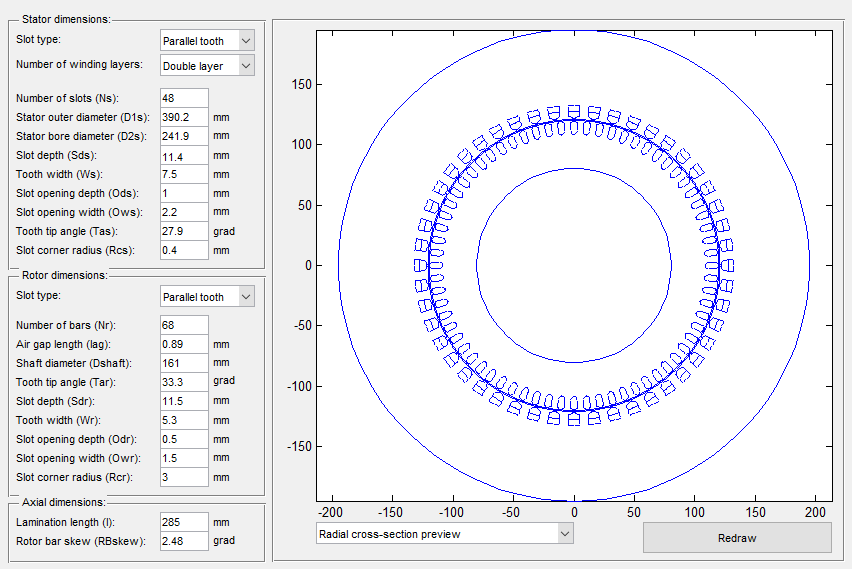

In [83]:
Image(filename='Geometry Editor.png', width=700)

### 13.2 Windings Property Editor

Windings Property Editor window of motoranalysis toolbox requires the following data for stator winding.

In [84]:
print ('Ns =', Ns) #Number of slots
layer=2 #Number of winding layers
print ('layer =',layer)
Npp=a1 #Number of parallel paths
print ('Npp =',Npp)
Lsew=Xsl/(lambda_s+lambda_ds+lambda_ec)*lambda_ec/(2*math.pi*f) #End winding inductance in H
print ('Lsew =',2*Lsew)
print ('Rs =',2*Rs) #Winding phase resistance in ohm
W=ns*ap #Number of conductors per slot
print ('W =',W)
fillfactor=Kfill #Slot fill factor
print ('fillfactor =',fillfactor)
ks=1/rho_cu_80 #Winding material conductivity in S/m
print ('ks =',ks)

Ns = 48
layer = 2
Npp = 2
Lsew = 1.0683011478009899e-05
Rs = 0.011219576596035574
W = 12
fillfactor = 0.44
ks = 46057293.24830448


10/12 stator slot winding configuration is selected.

Windings Property Editor window of motoranalysis toolbox requires the following data for rotor winding.

In [85]:
print ('Nr =',Nr) #Number of bars
print ('RBskew =',RBskew) #Rotor bar skew in grad
kr=1/rho_cu_80 #Winding material conductivity in S/m
print ('kr =',kr)
Rre=Rbe_Sn # End ring resistance (ohm)
print ('Rre =',Rre)

Nr = 68
RBskew = 2.4769349313277975
kr = 46057293.24830448
Rre = 0.00038718551198413934


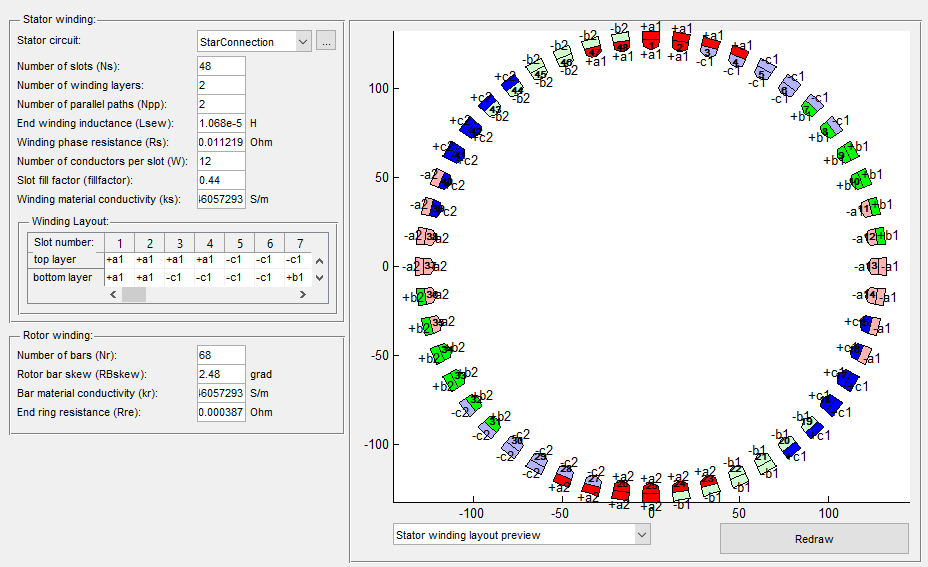

In [86]:
Image(filename='Windings Property Editor.png', width=700)

### 13.3 Iron Core Property Editor

Iron Core Property Editor window of motoranalysis toolbox requires the following data for iron core.

The core material is M270-35A.

In [87]:
mu_lin=(1-0.1)/(112-30)/u0 #Linear relative permeability
print ('mu_lin =',mu_lin)
k_st=0.95 #Stacking factor
print ('k_st =',k_st)

mu_lin = 8734.112730652794
k_st = 0.95


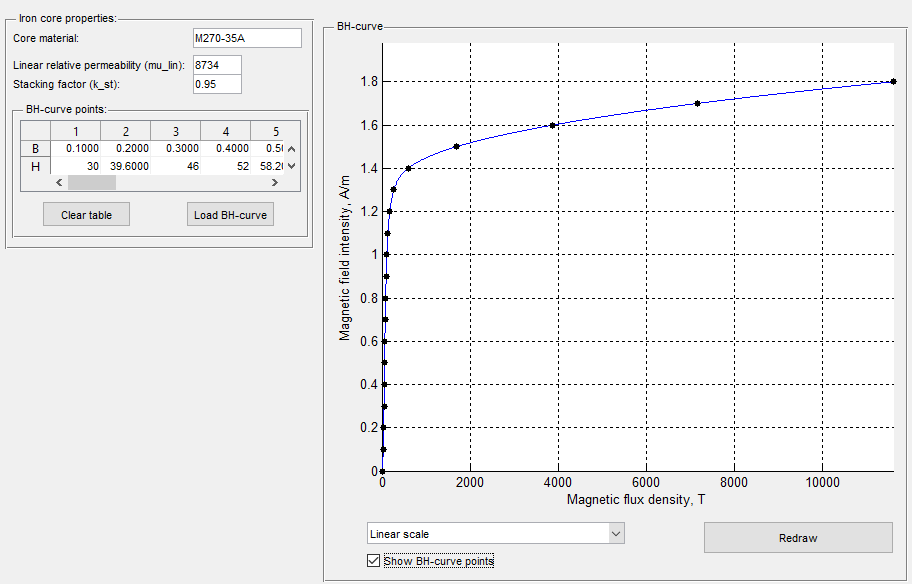

In [88]:
Image(filename='Iron Core Property Editor.png', width=700)

### 13.4 Mesh Editor

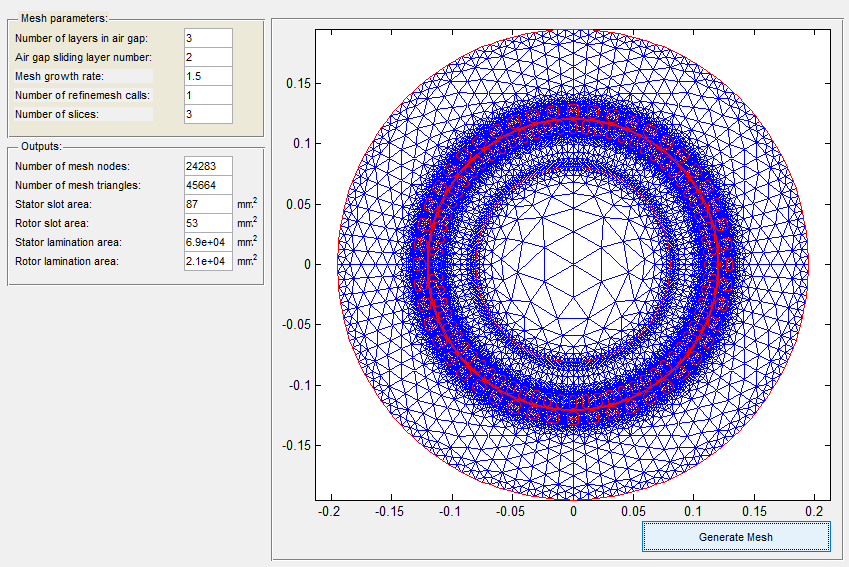

In [89]:
Image(filename='Mesh Editor.png', width=700)

### 13.5 General Settings

General setting are selected as shown in the figure below. The intertia of the motor shall be calculated.

In [90]:
Grotor=Gr+Gcur+Gshaft #Rotor weight in kg
print ('Grotor =',Grotor,'kg')
J=Grotor*Dis*Dis/2 #Moment of inertia in kg.m^2
print ('J =',J)

Grotor = 203.44936380497944 kg
J = 5.9537074917052175


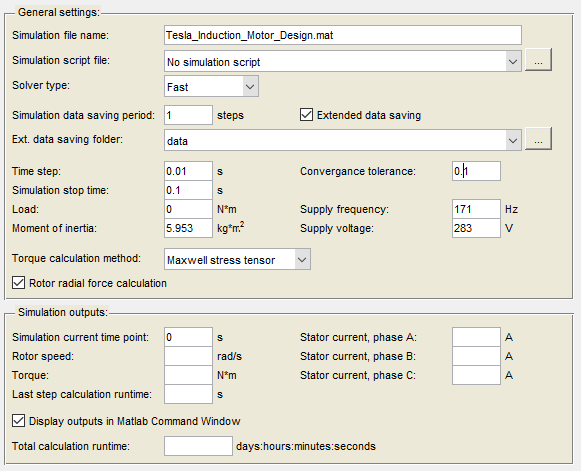

In [91]:
Image(filename='General Settings.png', width=500)

### 13.6 Plot Wizard Outputs

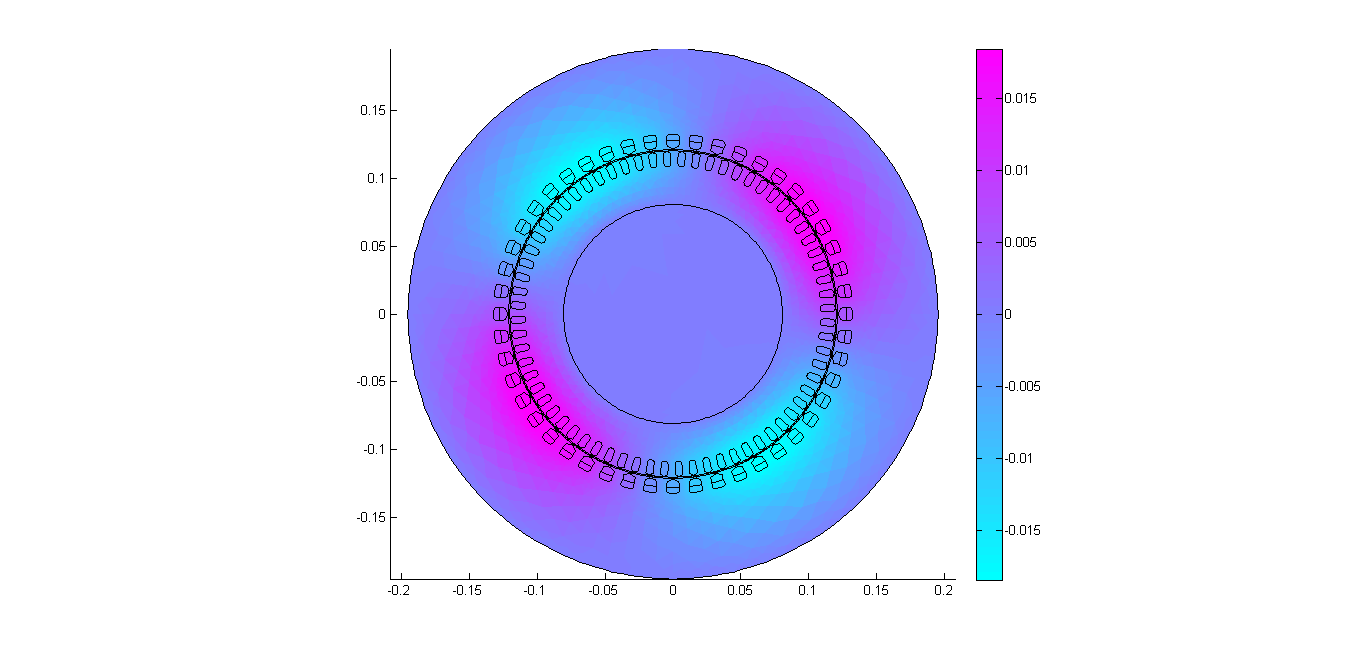

In [92]:
Image(filename='Magnetic Vector Potential Distribution.png')

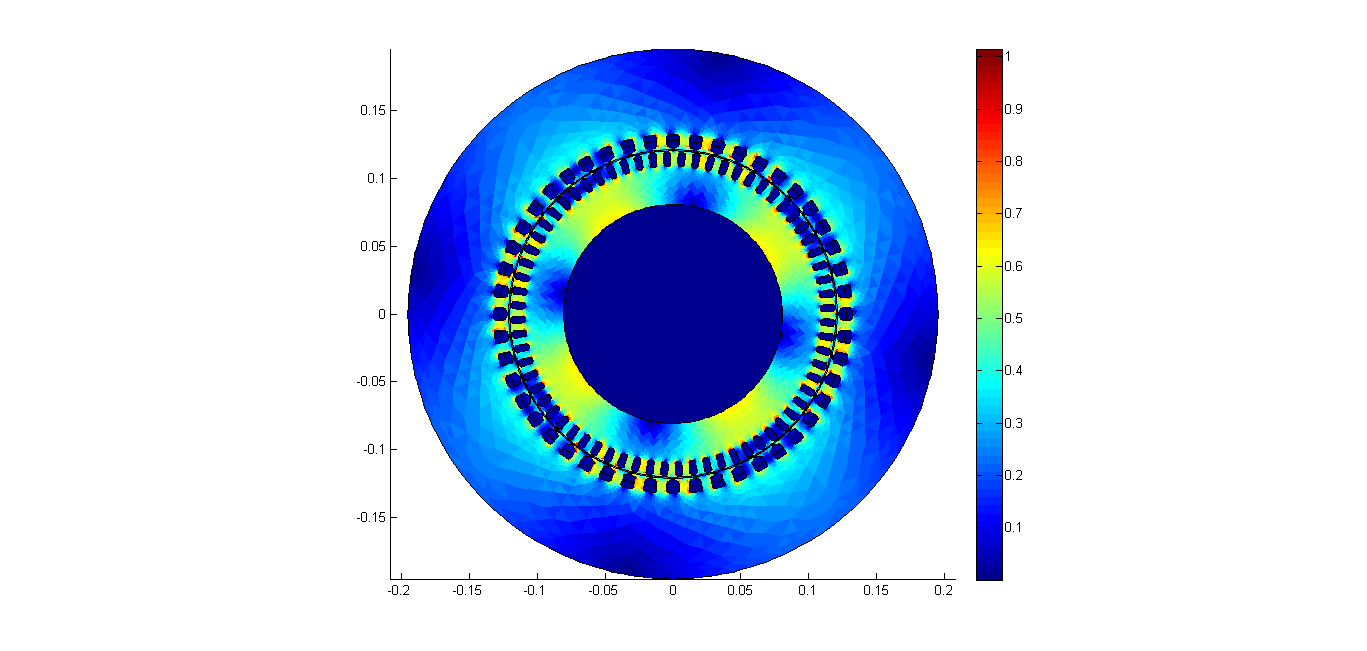

In [93]:
Image(filename='Magnetic Flux Density Distribution.png')

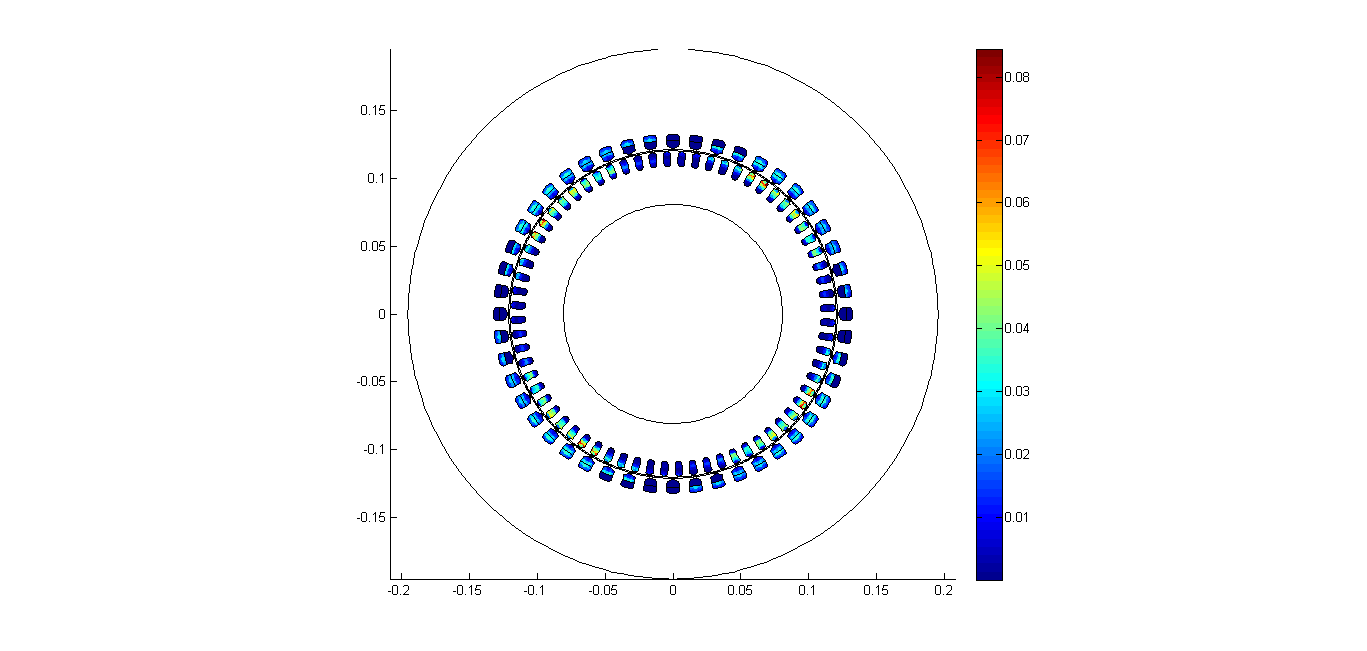

In [94]:
Image(filename='Joule Loss Distribution.png')

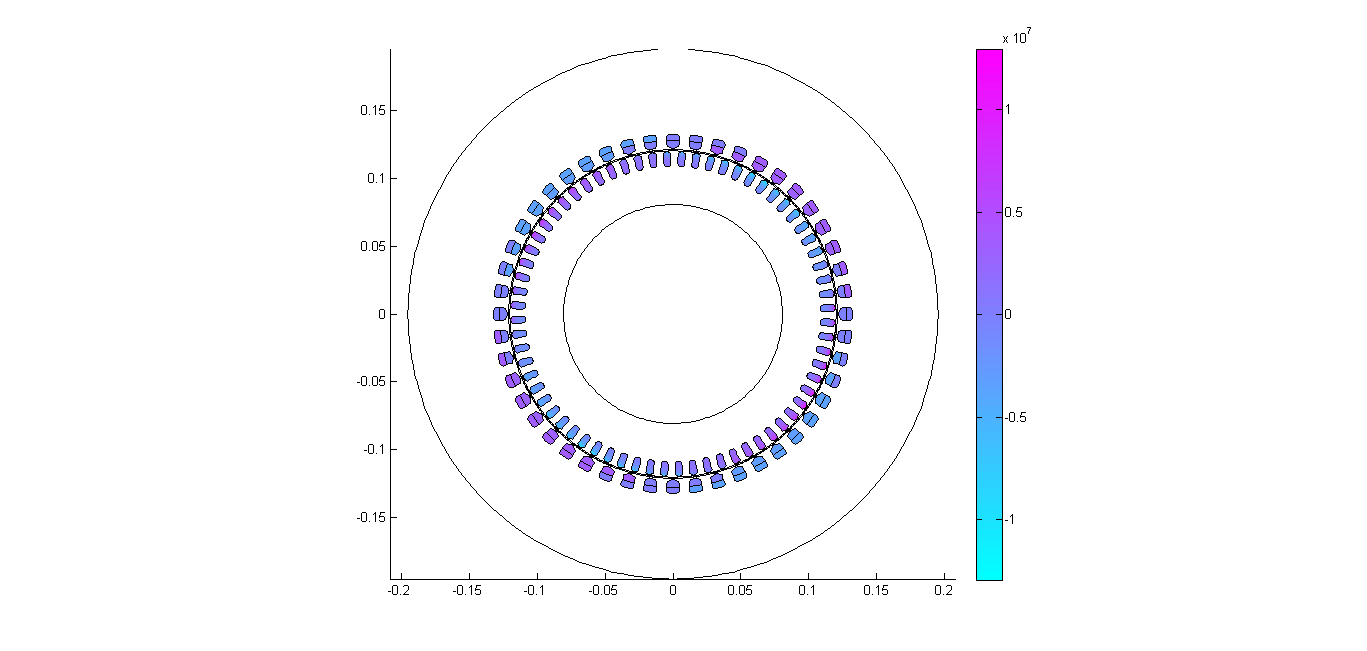

In [95]:
Image(filename='Current Density Distribution.png')

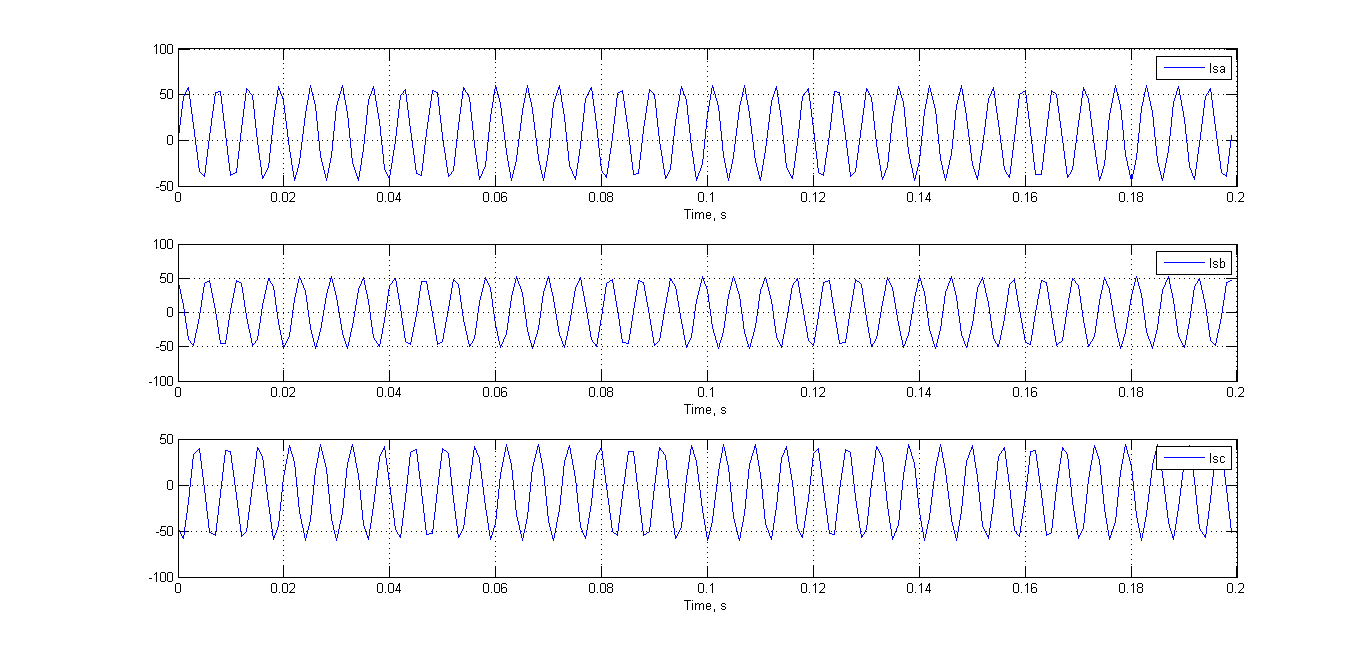

In [96]:
Image(filename='Stator Currents.png')

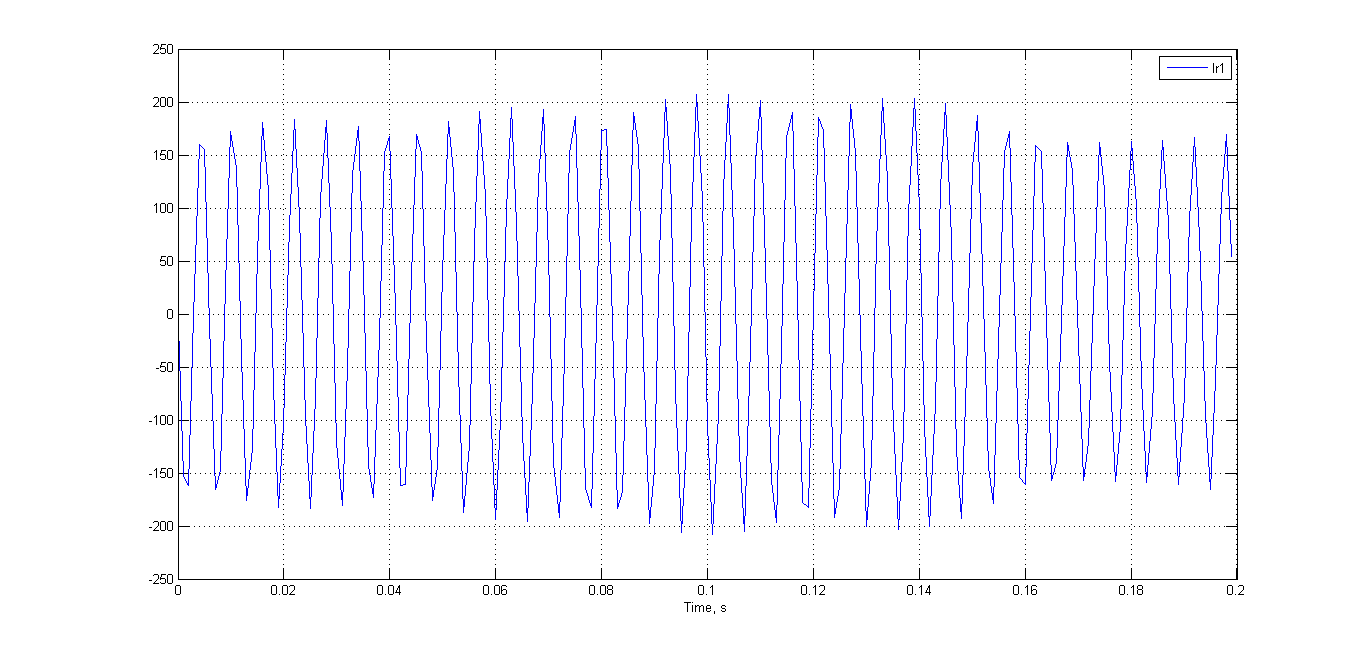

In [97]:
Image(filename='Rotor Bar Current.png')

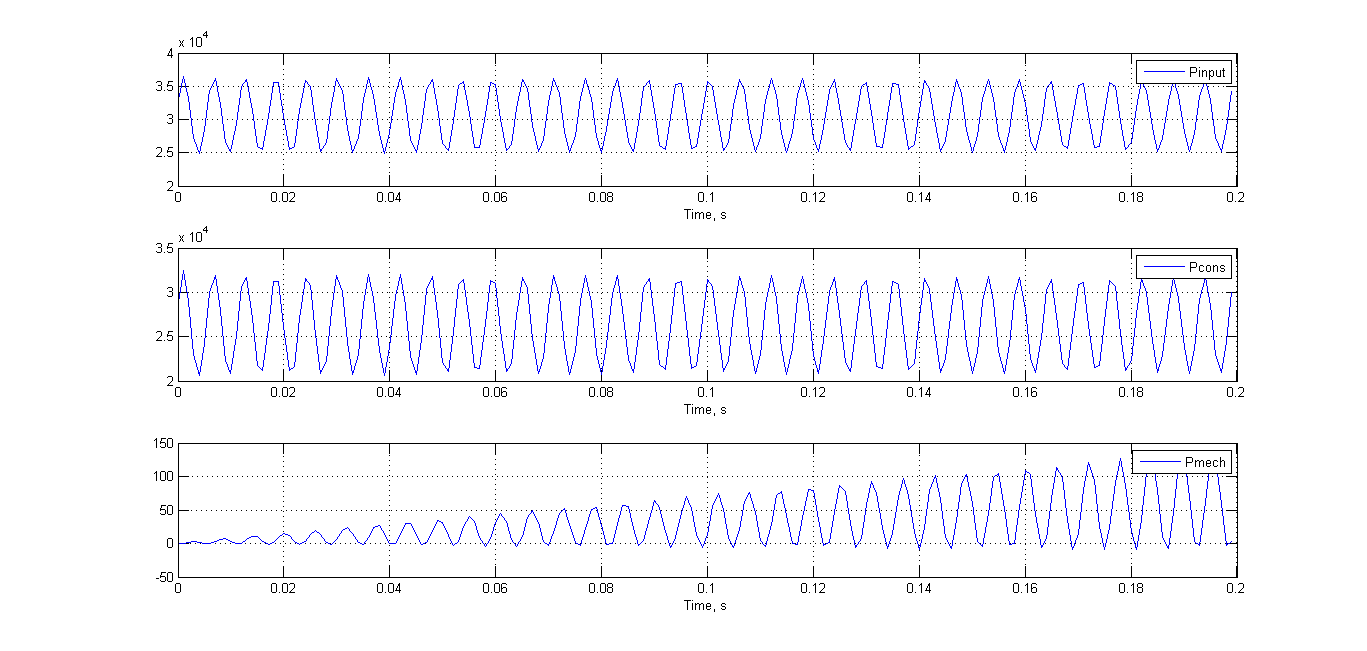

In [98]:
Image(filename='Input Consumed Mechanical Powers.png')

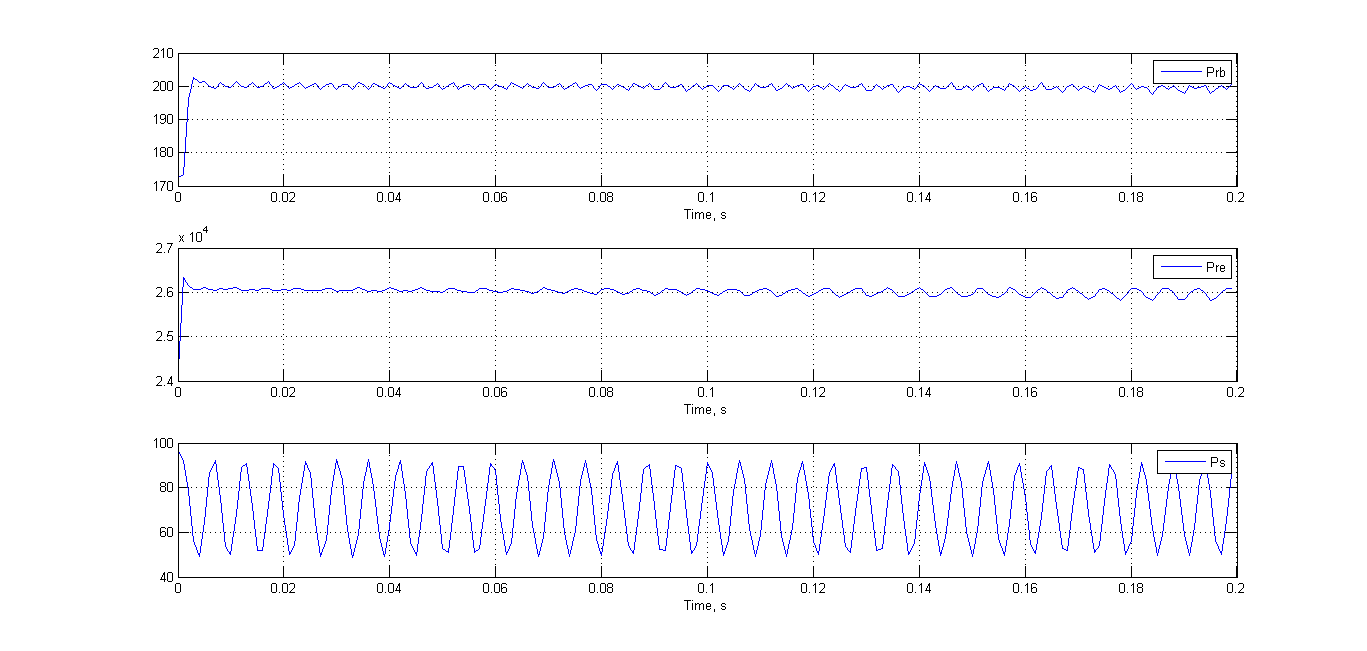

In [99]:
Image(filename='Rotor Bar Loss Rotor End Ring Loss Stator Consumed Power.png')

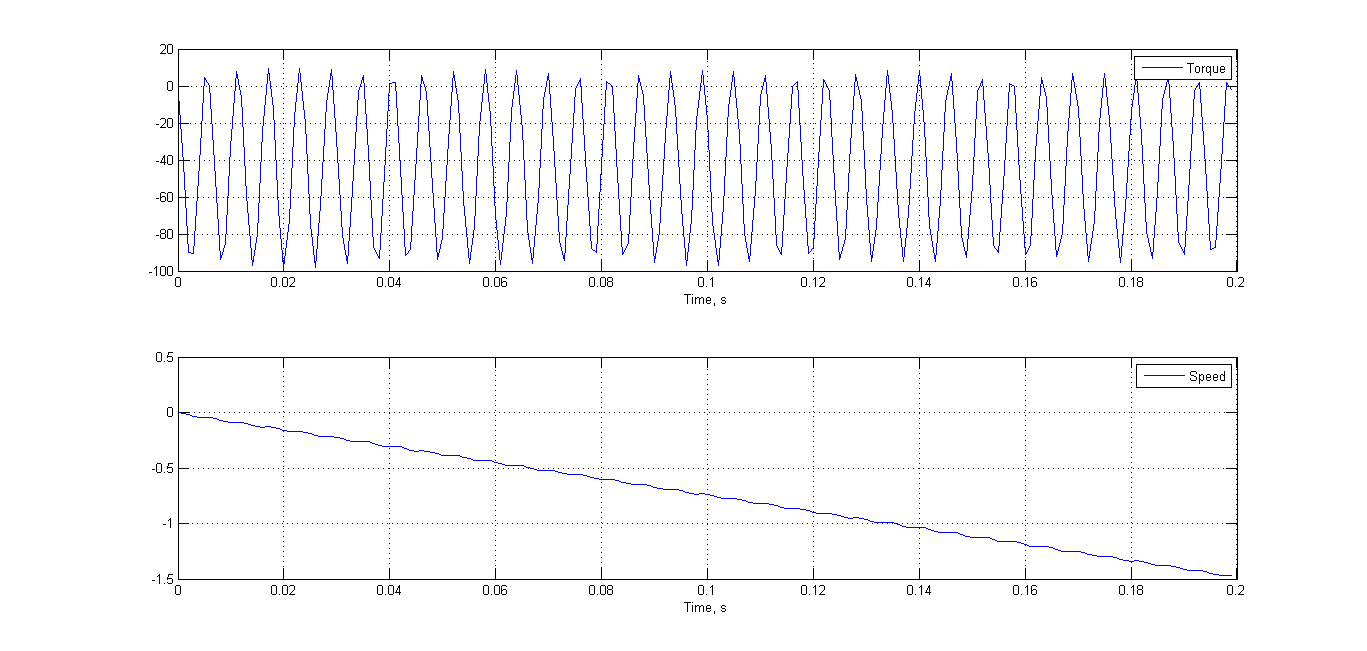

In [100]:
Image(filename='Torque Speed.png')

## 14. Conclusion

The design specifications of Tesla Model S 85 induction motor in this project are gathered from internet database. The design procedure is followed from the 1st reference in the reference list below. Analytically designed motor is simulated using motoranalysis tool in Matlab environment.

In this firs trial, the current densities are increased to a high value and the magnetic loading is boosted since the motor is known to be a liquid cooled motor.

Number of parallel paths (coils in parallel) are selected as 2.

The slot areas both in rotor and the stator so small that only liquid cooling can satisfy the thermal performance.

The efficiency is found as 93% and the weight of the machine is found as 351kg.

## References

* I. Boldea and S.A. Nasar, "The Induction Machine Handbook", CRC Press LLC, 2002
* http://keysan.me/ee564/
* https://teslamotorsclub.com/tmc/threads/changing-torque-curves.959/
* http://sites.ieee.org/miami/files/2014/11/Hendershot-FIU-Lecture.pdf
* http://cogent-power.com/cms-data/downloads/m270-35a_1.pdf
* J. Pyrhönen, T. Jokinen, and V. Hrabovcová, "Design of Rotating Electrical Machines", Wiley, 2014
* http://www.e-driveonline.com/conferences/wp-content/uploads/2014/01/CD-adapco.pdf
* http://richard.grisel.free.fr/ICEM2012/TUTORIALS/TUT3.pdf
* http://www.elsan-tr.com/images/elsan/files/elsan-catalog.pdf

Notes: Modification of torque-speed equation